In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree

In [16]:
df=pd.read_csv(r"C:\Users\sathv\LU\datasets\general_data.csv")
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

Preprocessing:

In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [18]:
print(df["NumCompaniesWorked"].mean())
print(df['TotalWorkingYears'].mean())

2.6948303347756775
11.279936378095888


In [19]:
CompaniesWorked=np.where(df["NumCompaniesWorked"].isnull(),3,df["NumCompaniesWorked"])
df["NumCompaniesWorked"]=CompaniesWorked
df["NumCompaniesWorked"].isnull().sum()
TotalYears=np.where(df["TotalWorkingYears"].isnull(),11,df['TotalWorkingYears'])
df["TotalWorkingYears"]=TotalYears
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [30]:
#Preprocessing
lab_enc=preprocessing.LabelEncoder()
df["Attrition"]=lab_enc.fit_transform(df["Attrition"])
df['BusinessTravel']=lab_enc.fit_transform(df['BusinessTravel'])
df['Department']=lab_enc.fit_transform(df['Department'])
df['EducationField']=lab_enc.fit_transform(df['EducationField'])
df['Gender']=lab_enc.fit_transform(df['Gender'])
df['JobRole']=lab_enc.fit_transform(df['JobRole'])
df['MaritalStatus']=lab_enc.fit_transform(df['MaritalStatus'])
df.head()

Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   51          0               2           2                 6          2   
1   31          1               1           1                10          1   
2   32          0               1           1                17          4   
3   38          0               0           1                 2          5   
4   32          0               2           1                10          1   

   EducationField  EmployeeCount  EmployeeID  Gender  ...  NumCompaniesWorked  \
0               1              1           1       0  ...                 1.0   
1               1              1           2       0  ...                 0.0   
2               4              1           3       1  ...                 1.0   
3               1              1           4       1  ...                 3.0   
4               3              1           5       1  ...                 4.0   

   Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0       Y                 11              8                 0   
1       Y                 23              8                 1   
2       Y                 15              8                 3   
3       Y                 11              8                 3   
4       Y                 12              8                 2   

  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0               1.0                      6               1   
1               6.0                      3               5   
2               5.0                      2               5   
3              13.0                      5               8   
4               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
features=['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','Gender',  'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
        'NumCompaniesWorked', 'PercentSalaryHike',  'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
rf_model.fit(X=df[features],y=df["Attrition"])
print(rf_model.oob_score_)

1.0


In [22]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.0959064797048046
BusinessTravel 0.0285804309752357
Department 0.026511564290392194
DistanceFromHome 0.06990435777886991
Education 0.04136387094453893
EducationField 0.041664516088241656
Gender 0.018986812798556543
JobLevel 0.03748873505875112
JobRole 0.05512946071255974
MaritalStatus 0.03955966892119471
MonthlyIncome 0.0940974281525989
NumCompaniesWorked 0.05651799390382475
PercentSalaryHike 0.06531109002755557
StockOptionLevel 0.03400068730680125
TotalWorkingYears 0.08473451628262853
TrainingTimesLastYear 0.044788365816658175
YearsAtCompany 0.06880471701878721
YearsSinceLastPromotion 0.04285046304359589
YearsWithCurrManager 0.053798841174404616


In [23]:
df_train=df[['Age','DistanceFromHome','JobRole','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']]
df_train.dtypes

Age                     int64
DistanceFromHome        int64
JobRole                 int32
MonthlyIncome           int64
NumCompaniesWorked    float64
PercentSalaryHike       int64
TotalWorkingYears     float64
YearsAtCompany          int64
dtype: object

In [25]:
rf_model.fit(X=df_train,y=df["Attrition"])
print(rf_model.oob_score_)

0.999546485260771


In [32]:
#Creating Tree
tree_model=tree.DecisionTreeClassifier(max_depth=6)
tree_model.fit(X=df_train,y=df['Attrition'])

DecisionTreeClassifier(max_depth=6)

In [33]:
with open('dtree1.dot','w') as f:
    f=tree.export_graphviz(tree_model,feature_names=['Age','DistanceFromHome','JobRole','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany'],out_file=f)

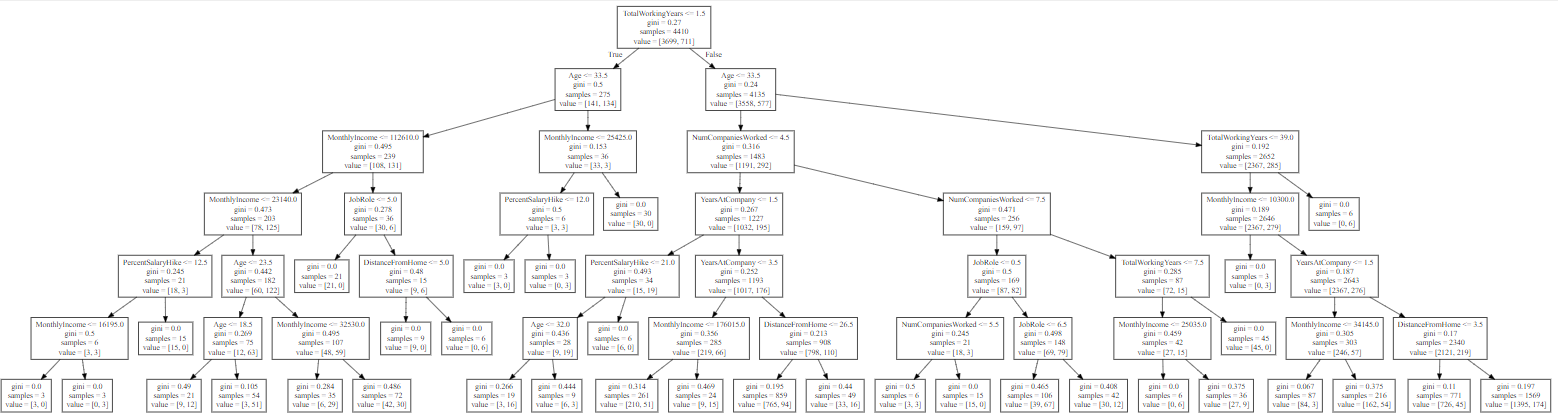

Inferences:
1) If total working years less than 1.5 